In [1]:
from google.colab import drive

# mounting my google drive
drive.mount("/content/gdrive", force_remount=True)

pic_root = "/content/gdrive/MyDrive/Astronomie/Astrophoto/Moon/060325/"

import os

# ! ls $pic_root
print(os.path.exists(pic_root))
print(os.listdir(pic_root))

# Clone the repo "Handheld Multi-Frame Super-Resolution"
! git clone https://github.com/mfournigault/Handheld-Multi-Frame-Super-Resolution.git





Mounted at /content/gdrive
True
['P1040213.dng', 'P1040227.dng', 'P1040224.dng', 'P1040222.dng', 'P1040228.dng', 'P1040218.dng', 'P1040215.dng', 'P1040221.dng', 'P1040226.dng', 'P1040219.dng', 'P1040223.dng', 'P1040225.dng', 'P1040214.dng', 'P1040220.dng', 'P1040217.dng', 'P1040216.dng']
Cloning into 'Handheld-Multi-Frame-Super-Resolution'...
remote: Enumerating objects: 1488, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 1488 (delta 112), reused 139 (delta 102), pack-reused 1287 (from 1)
Receiving objects: 100% (1488/1488), 7.80 MiB | 29.24 MiB/s, done.
Resolving deltas: 100% (1092/1092), done.


In [2]:
print(os.getcwd())

/content


In [13]:
!uv pip install -q --system numba-cuda==0.4.0

In [14]:
from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1

In [16]:
mfsr_root = "/content/Handheld-Multi-Frame-Super-Resolution"
# creating a virtual env to not get conflicts with default collab env
!apt-get update
# !apt-get install python3.10
!pip install virtualenv
!virtualenv --python=python3.11 /content/gdrive/MyDrive/venvs/mf-superres
print("Installing requirements ...")
os.chdir(mfsr_root)
!source /content/gdrive/MyDrive/venvs/mf-superres/bin/activate; pip install -r "requirements.txt"

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
created virtual environment CPython3.11.11.final.0-64 in 10378ms
  cre

When the env is created in your G-drive, with the packages installed inside it, you can comment the code above (for installing requirements), and just import the path to your env packages to use them as below.

In [17]:
import sys
# add the path of the virtual environmentsite-packages to colab system path
sys.path.append("/content/gdrive/MyDrive/venvs/mf-superres/lib/python3.11/site-packages")


In [18]:
os.chdir(mfsr_root)
print(os.getcwd())

/content/Handheld-Multi-Frame-Super-Resolution


In [19]:
import matplotlib.pyplot as plt
from handheld_super_resolution import process
from skimage import img_as_ubyte

We prepare the context of execution of the super_resolution algorithm with options, parameters etc...

In [20]:
# Specify verbose options
options = {'verbose' : 1}



# Specify the scale as follows. All the parameters are automatically
# choosen but can be overwritten : check params.py to see the entire list
# of configurable parameters.
params={
        "scale":1,
        "debug":True,
        "merging" : {
            "kernel": "handheld"},
        "accumulated robustness denoiser" : {
                    # Trying a median filter at first because we process astronomical pictures captures with a high camera gain (ISO)
                    # "median":{"on":False, # post process median filter
                    #           "radius max":3,  # maximum radius of the median filter. Tt cannot be more than 14. for memory purpose
                    #           "max frame count": 8}#,
                    # "gauss":{"on":False, # post process gaussian filter
                    #          "sigma max" : 1.5, # std of the gaussian blur applied when only 1 frame is merged
                    #          "max frame count" : 8}#, # number of merged frames above which no blur is applied
                    "merge":{"on":True, # filter for the ref frame accumulation
                             "rad max": 2,# max radius of the accumulation neighborhod
                             "max multiplier": 8, # Multiplier of the covariance for single frame SR
                             "max frame count" : 8} # # number of merged frames above which no blur is applied
                    },
        "post processing" : {
            "on":True,
            "do color correction":False,
            "do tonemapping":True,
            "do gamma":True,
            "do devignette":False,
            "do sharpening":False
            }
        # Post processing is enabled by default,
        # but it can be turned off here
        }

# calling the pipeline
output_img, debug_dict = process(pic_root, options, params)


/content/Handheld-Multi-Frame-Super-Resolution/handheld_super_resolution/utils_dng.py:118: UserWarning: The input images have a photometric interpretation of type "RGB", but only ['BlackIsZero', 'Color Filter Array'] are supprted.
  warnings.warn('The input images have a photometric interpretation '\


Estimating noise curves ...


Brightnesses: 100%|██████████| 39/39 [00:02<00:00, 13.01it/s]
/content/Handheld-Multi-Frame-Super-Resolution/handheld_super_resolution/params.py:25: UserWarning: Warning.... Tile sizes of more than 32 cannot be                       processed by the bloc matching module at the moment.                      Falling back to Ts=32
  warnings.warn("Warning.... Tile sizes of more than 32 cannot be \


  ----------
|ISO : 160
|Image brightness : 0.01
|expected noise std : 1.27e-03
|Estimated SNR : 6.98

Processing reference image ---------


Ref Img processed (Total)                          :  2306.63 milliseconds

Processing image 1 ---------



/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/dispatcher.py:579: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/dispatcher.py:579: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/dispatcher.py:579: NumbaPerformanceWarning: Grid size 12 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/dispatcher.py:579: NumbaPerformanceWarning: Grid size 48 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/dispatcher.py:579: NumbaPerformanceWarning: Grid siz


Image processed (Total)                            :  6977.18 milliseconds

Processing image 2 ---------


Image processed (Total)                            :  385.31 milliseconds

Processing image 3 ---------


Image processed (Total)                            :  350.21 milliseconds

Processing image 4 ---------


Image processed (Total)                            :  353.12 milliseconds

Processing image 5 ---------


Image processed (Total)                            :  353.24 milliseconds

Processing image 6 ---------


Image processed (Total)                            :  348.39 milliseconds

Processing image 7 ---------


Image processed (Total)                            :  349.48 milliseconds

Processing image 8 ---------


Image processed (Total)                            :  353.98 milliseconds

Processing image 9 ---------


Image processed (Total)                            :  358.49 milliseconds

Processing image 10 ---------


Image processed (Total)                    

95 126


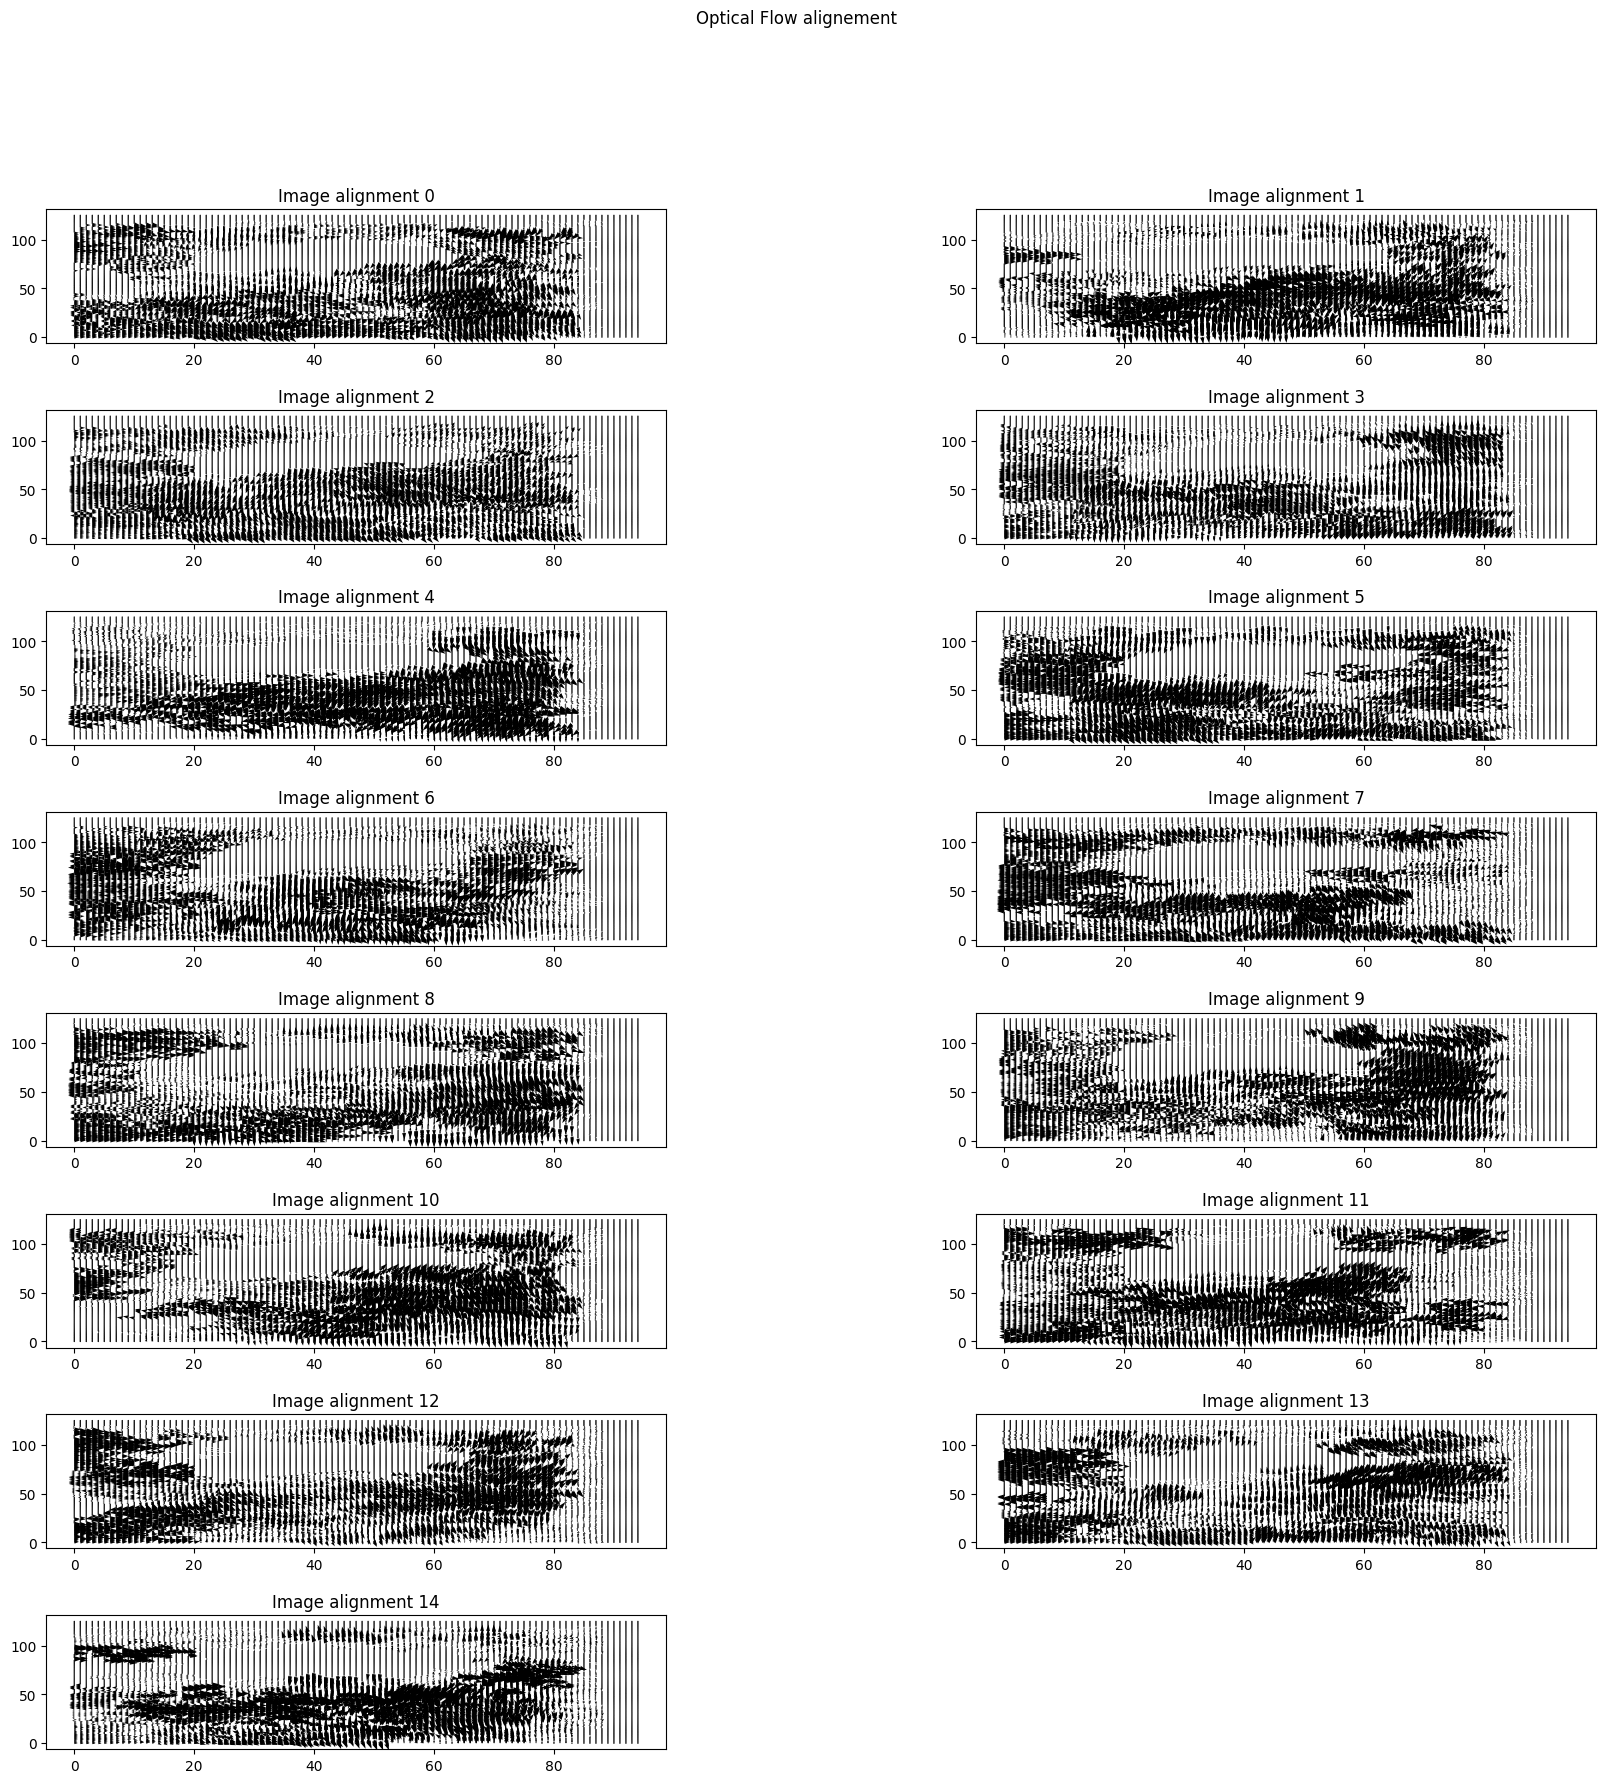

In [22]:
import numpy as np
# Plotting intermediate results on alignment, robustness, etc ..
# debug_dict["flow"].shape
# debug_dict["robustness"].shape
flow = np.array(debug_dict["flow"])
print(flow.shape[1], flow.shape[2])


if debug_dict is not None:
  # Calculate the number of rows and columns for the subplots
  num_frames = flow.shape[0]
  num_cols = 2  # Number of columns in the subplot grid
  num_rows = (num_frames + num_cols - 1) // num_cols  # Calculate number of rows needed

  # Create the figure and subplots with the calculated dimensions
  fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))
  fig.suptitle("Optical Flow alignement")
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

  # Iterate through the frames and plot them in the corresponding subplots
  for i in range(num_frames):
    x, y = np.mgrid[0:flow.shape[1], 0:flow.shape[2]]

    # Calculate the row and column index for the current subplot
    row_index = i // num_cols
    col_index = i % num_cols

    # Access the subplot using the calculated indices
    ax = axs[row_index, col_index] if num_rows > 1 else axs[col_index]

    ax.set_title("Image alignment {}".format(i))
    ax.quiver(x, y, flow[i, :, :, 0], flow[i, :, :, 1])

  # Hide any unused subplots, if necessary
  for i in range(num_frames, num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axs[row_index, col_index] if num_rows > 1 else axs[col_index]
    ax.set_visible(False)

(15, 3016, 4016)


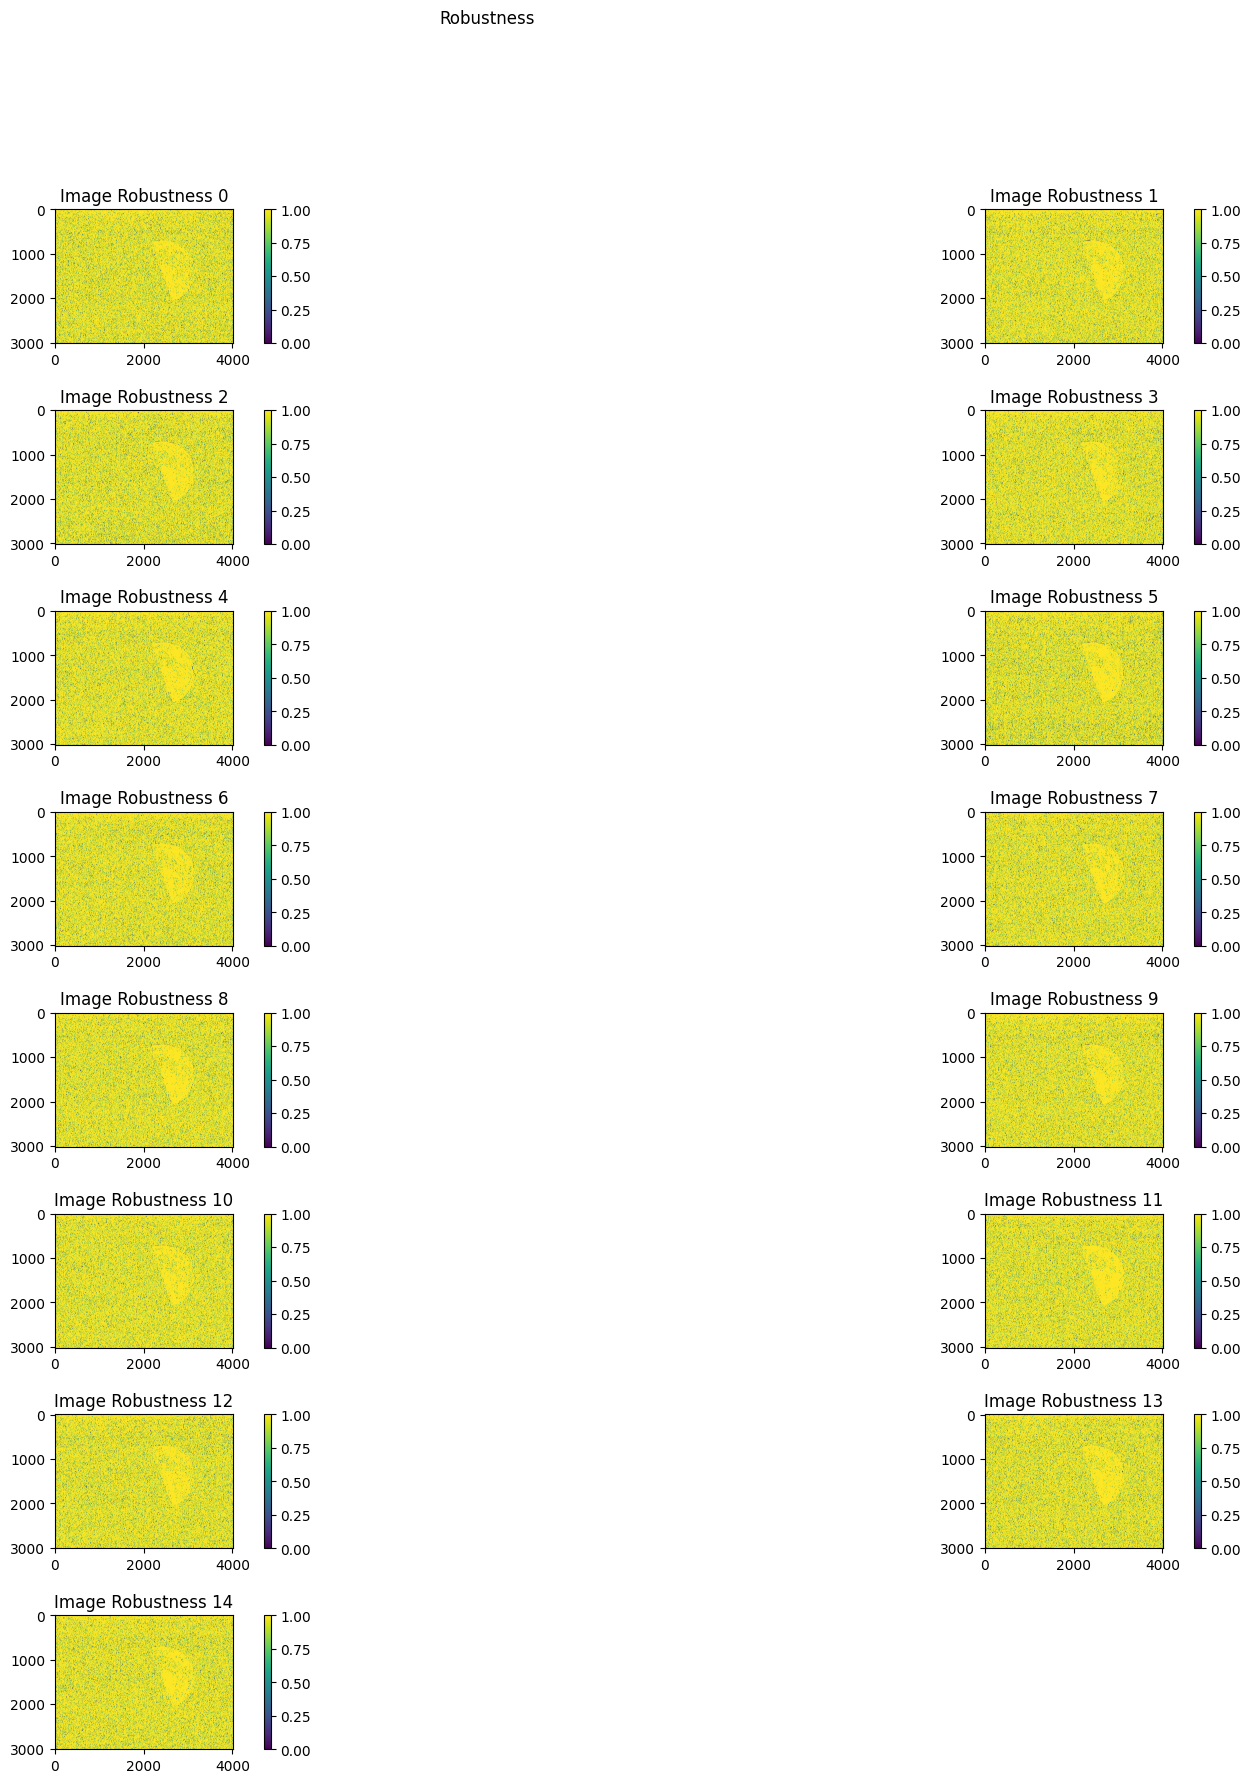

In [25]:
robustness = np.array(debug_dict["robustness"])
print(robustness.shape)

if debug_dict is not None:
  num_frames = flow.shape[0]
  num_cols = 2  # Number of columns in the subplot grid
  num_rows = (num_frames + num_cols - 1) // num_cols  # Calculate number of rows needed

  # Create the figure and subplots with the calculated dimensions
  fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))
  fig.suptitle("Robustness")
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

  for i in range(0,robustness.shape[0]):
    x,y = np.mgrid[0:robustness.shape[1], 0:robustness.shape[2]]

    # Calculate the row and column index for the current subplot
    row_index = i // num_cols
    col_index = i % num_cols

    # Access the subplot using the calculated indices
    ax = axs[row_index, col_index] if num_rows > 1 else axs[col_index]
    ax.set_title("Image Robustness {}".format(i))
    img = ax.imshow(robustness[i,:,:])
    fig.colorbar(img,ax=ax)

  # Hide any unused subplots, if necessary
  for i in range(num_frames, num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axs[row_index, col_index] if num_rows > 1 else axs[col_index]
    ax.set_visible(False)

plt.show()

(4016, 3016)


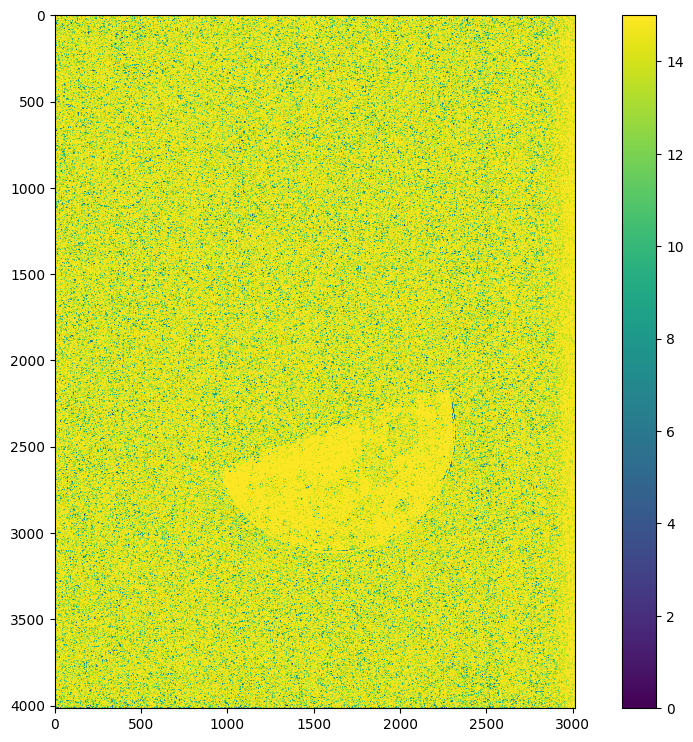

In [26]:
acc_robustness = np.array(debug_dict["accumulated robustness"])
print(acc_robustness.shape)

if debug_dict is not None:
  fig = plt.figure("Accumulated Robustness", figsize=(12,9))
  im = plt.imshow(acc_robustness, interpolation = 'none')
  fig.colorbar(im)
  plt.show()

([], [])

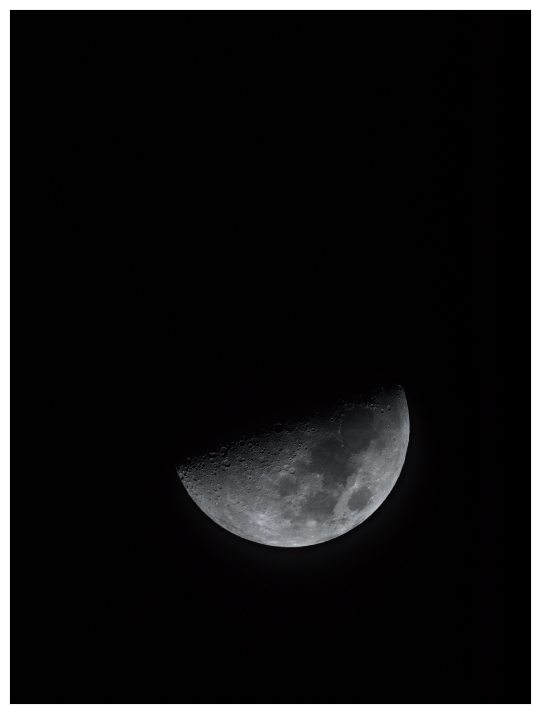

In [27]:
plt.imsave(os.path.join(pic_root, "super_resolution.png"), img_as_ubyte(output_img))
# plotting the result
plt.figure("output", figsize=(12,9))
plt.imshow(output_img, interpolation = 'none')
plt.xticks([])
plt.yticks([])